In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime
start = datetime.datetime(1985, 1, 1)
end = datetime.date.today()
ftse = web.DataReader("^FTSE", 'yahoo', start, end)['Adj Close']
sp500 = web.DataReader("^GSPC", 'yahoo', start, end)['Adj Close']

In [2]:
table = pd.concat([ftse, sp500], axis=1, join='inner')
table.columns =['ftse_p','sp500_p']

In [3]:
table['ftse_r'] = table['ftse_p'].pct_change()
table['sp500_r'] = table['sp500_p'].pct_change()
returnstable = table[['ftse_r','sp500_r']][1:].dropna()

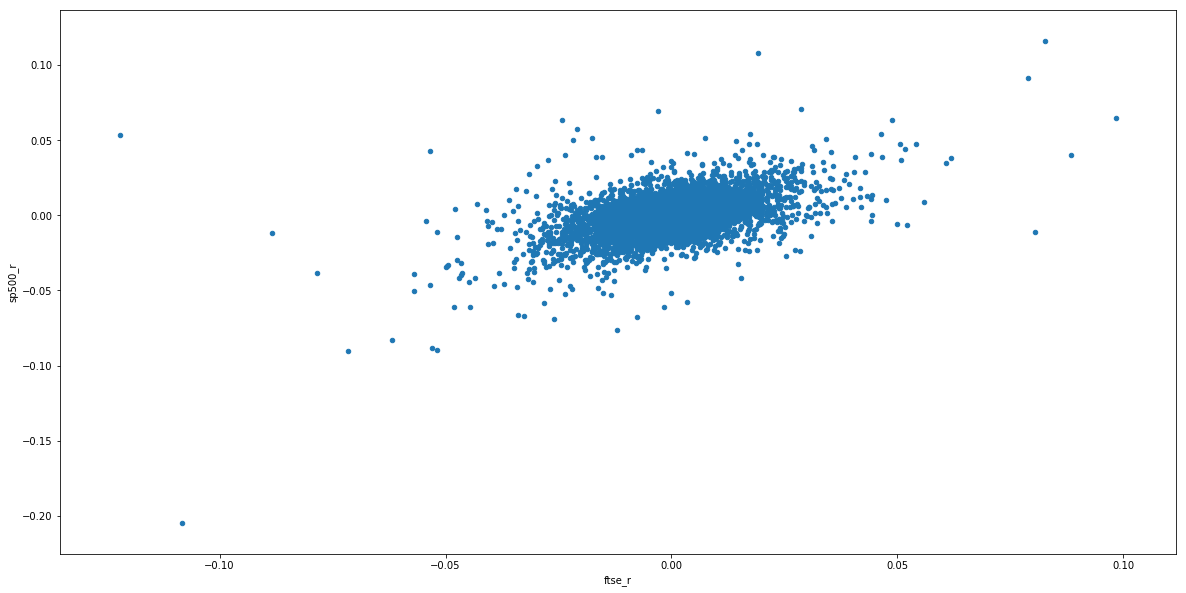

In [4]:
returnstable.plot.scatter('ftse_r','sp500_r',figsize=(20, 10))

In [5]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# K Means Cluster
model = KMeans(n_clusters=20)
model.fit(returnstable)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

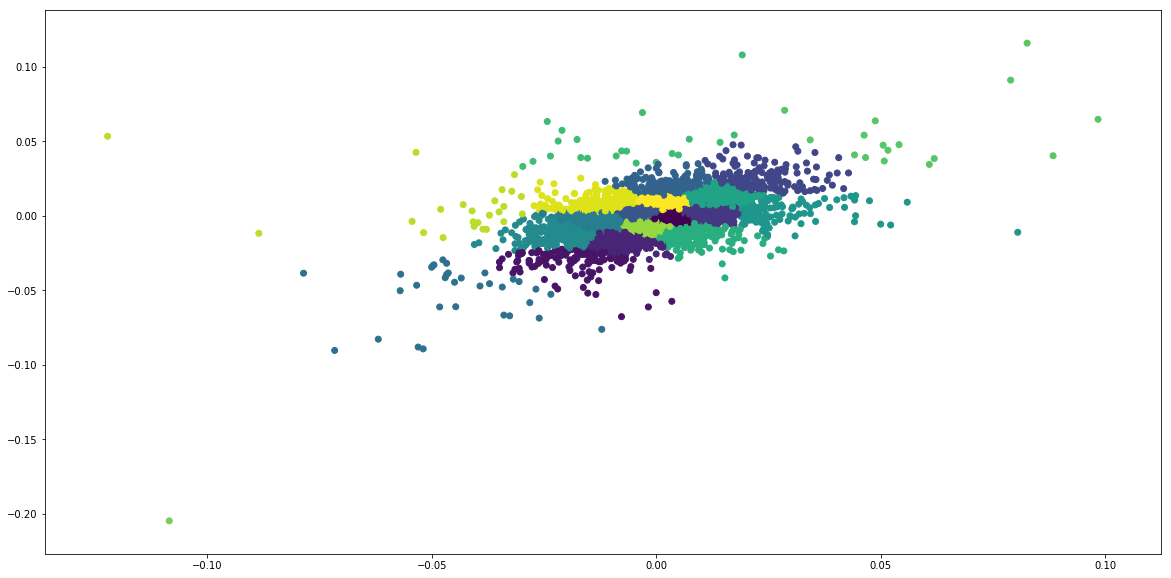

In [6]:
plt.figure(figsize=(20, 10))
plt.scatter(returnstable.ftse_r, returnstable.sp500_r, c=model.labels_)